# Worked Problems for Assessment, Computer Infrastructure Module  
Autumn 2025, Atlantic Technological University  
Author: Susan Collins  

## Problem 1: Data from yfinance  
Brief:
```
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

    Facebook (META)
    Apple (AAPL)
    Amazon (AMZN)
    Netflix (NFLX)
    Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.


### Importing libraries

In [1]:
# import NumPy to manipulate numerical arrays
import numpy as np
# import Python Data Analysis Library
import pandas as pd
# import Matplotlib.PyPlot for plotting
import matplotlib.pyplot as plt
# import yfinance for financial data for these exercises
# https://github.com/ranaroussi/yfinance
import yfinance as yf

### Downloading financial data  
The [yfinance documentation](https://ranaroussi.github.io/yfinance/) front page
contains a Quick Start guide.  
The [`yfinance.download`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html) function creates a Pandas DataFrame. 


_Note:  The call to `yfinance.download` produced a FutureWarning to alert users 
that the default value of the `auto_adjust` argument has changed. Should I
suppress this warning or look further into the uses of this argument?  
This [StackOverflow answer](https://stackoverflow.com/a/37453925) says that the auto_adjust parameter will adjust the historical stock prices for splits and dividends, so that long-term comparisons of stick prices can be made. As we are looking at prices over the span of 5 days, this parameter is very unlikely to have any effect on this analysis; but if I call it with its default value of True, it does suppress the annoying warning._

In [2]:
# Testing the yfinance.download function with a multiple stock tickers
download_data = yf.download(['META','AAPL','AMZN','NFLX','GOOG'], period='1wk', auto_adjust=True)

# Look at the resulting DataFrame.
#print(download_data.columns)
print(download_data.shape)
print(download_data.dtypes)
#download_data

[*********************100%***********************]  5 of 5 completed

(5, 25)
Price   Ticker
Close   AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
High    AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Low     AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Open    AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Volume  AAPL        int64
        AMZN        int64
        GOOG        int64
        META        int64
        NFLX        int64
dtype: object


### Writing financial data to CSV file  
Pandas has a function [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) to write to CSV files.

In [3]:
# Write DataFrame to a test CSV file in data directory.
download_data.to_csv("data/test.csv")

## Problem 2: Plotting Data  
### Reading in from the CSV file

In [4]:
# Reading DataFrame from CSV file using pandas.read_csv()
# (Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
# Parameters:
# header=[0,1] - The first two rows of the CSV file contain MultiIndex header information,
# index_col=0 - I want column 0, the dates, to be the index of the resulting DataFrame,
# parse_dates=[0] - I want the index values to be parsed as dates (i.e. as datetime objects.)
# (adapted from https://stackoverflow.com/a/37453925)
plot_data = pd.read_csv("data/test.csv", header=[0,1], index_col=0, parse_dates=[0])

# Look at resulting DataFrame
#print(plot_data.columns)
#print(plot_data.shape)
#print(plot_data.index)
#print(plot_data.dtypes)

plot_data

Price            Close                                                 \
Ticker            AAPL        AMZN        GOOG        META       NFLX   
Date                                                                    
2025-12-11  278.029999  230.279999  313.700012  652.178101  94.089996   
2025-12-12  278.279999  226.190002  310.519989  643.705017  95.190002   
2025-12-15  274.109985  222.539993  309.320007  647.510010  93.769997   
2025-12-16  274.609985  222.559998  307.730011  657.150024  94.570000   
2025-12-17  271.839996  221.270004  298.059998  649.500000  94.790001   

Price             High                                                 ...  \
Ticker            AAPL        AMZN        GOOG        META       NFLX  ...   
Date                                                                   ...   
2025-12-11  279.589996  232.110001  321.989990  654.746014  94.820000  ...   
2025-12-12  279.220001  230.080002  316.140015  710.420628  96.919998  ...   
2025-12-15  280.149994  227.929993  312.700012  653.000000  96.370003  ...   
2025-12-16  275.500000  223.660004  311.845001  662.539978  94.930000  ...   
2025-12-17  276.160004  225.190002  309.195007  661.229980  97.330002  ...   

Price             Open                                                 \
Ticker            AAPL        AMZN        GOOG        META       NFLX   
Date                                                                    
2025-12-11  279.100006  230.710007  321.100006  642.765733  93.900002   
2025-12-12  277.899994  229.869995  314.795013  649.270486  95.500000   
2025-12-15  280.149994  227.929993  312.625000  645.700012  96.019997   
2025-12-16  272.820007  223.039993  306.000000  643.500000  93.879997   
2025-12-17  275.010010  224.559998  308.795013  655.609985  95.980003   

Price         Volume                                          
Ticker          AAPL      AMZN      GOOG      META      NFLX  
Date                                                          
2025-12-11  33248000  28249600  25912100  13056700  43949000  
2025-12-12  39532900  35639100  21264800  14016900  49323100  
2025-12-15  50409100  47286100  22028900  15549100  40016500  
2025-12-16  37648600  39298900  21285200  14309100  34265000  
2025-12-17  49406521  43399540  27433464  14675497  49961691  

[5 rows x 25 columns]

### Sanity checking: compare written and read DataFrames  
For the purposes of this notebook, we can compare the downloaded DataFrame to 
the DataFrame read from the CSV file. This will tell us if the file has been 
read back in accurately.

The [`pandas.DataFrame.compare`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html) 
function lets us compare two DataFrames and returns another DataFrame showing 
non-matching values (and Nan where the values are a match.)


In [5]:
# Comparing the downloaded and read-from-file DataFrames.
plot_data.compare(download_data)

Price            Close                                                 \
Ticker            AMZN                    GOOG                   NFLX   
                  self       other        self       other       self   
Date                                                                    
2025-12-11         NaN         NaN         NaN         NaN        NaN   
2025-12-12         NaN         NaN         NaN         NaN  95.190002   
2025-12-15         NaN         NaN         NaN         NaN        NaN   
2025-12-16  222.559998  222.559998         NaN         NaN        NaN   
2025-12-17  221.270004  221.270004  298.059998  298.059998        NaN   

Price                        High                                    \
Ticker                       AMZN                   NFLX              
                other        self       other       self      other   
Date                                                                  
2025-12-11        NaN  232.110001  232.110001        NaN        NaN   
2025-12-12  95.190002         NaN         NaN  96.919998  96.919998   
2025-12-15        NaN         NaN         NaN  96.370003  96.370003   
2025-12-16        NaN  223.660004  223.660004        NaN        NaN   
2025-12-17        NaN         NaN         NaN  97.330002  97.330002   

Price              Low                                          Open  \
Ticker            AAPL                   NFLX                   AMZN   
                  self       other       self      other        self   
Date                                                                   
2025-12-11  273.809998  273.809998  92.760002  92.760002         NaN   
2025-12-12         NaN         NaN        NaN        NaN         NaN   
2025-12-15         NaN         NaN        NaN        NaN         NaN   
2025-12-16         NaN         NaN        NaN        NaN         NaN   
2025-12-17         NaN         NaN        NaN        NaN  224.559998   

Price                                         
Ticker                       NFLX             
                 other       self      other  
Date                                          
2025-12-11         NaN        NaN        NaN  
2025-12-12         NaN        NaN        NaN  
2025-12-15         NaN        NaN        NaN  
2025-12-16         NaN  93.879997  93.879997  
2025-12-17  224.559998        NaN        NaN

The `pandas.DataFrame.compare` function is showing many values as not identical, 
although they appear to be, due to the limited precision of floating-point 
representation in Python (e.g. [this article](https://www.geeksforgeeks.org/python/comparing-floating-points-number-for-almost-equality-in-python/).) 

Instead, we can use the `numpy.isclose()` function which can compare values with 
a small default tolerance level. (Suggested by [this StackOverflow answer](https://stackoverflow.com/a/33549675).)

In [6]:
# Sanity check 
np.isclose(plot_data, download_data)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]])

### Plotting the data  
Pandas has its own DataFrame plot function that calls MatPlotLib [`Pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

''

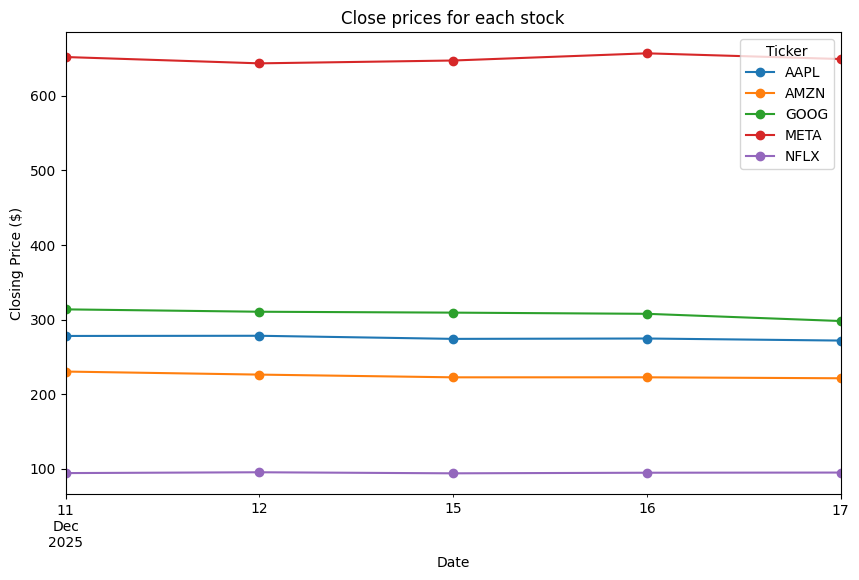

In [8]:
# Plot the Close prices for each of the five stocks.

fig,ax = plt.subplots(figsize=(10, 6))

plt.title("Close prices for each stock")
plt.ylabel("Closing Price ($)")
plt.xlabel("Date")

plot_data["Close"].plot(ax=ax, marker='o')


;

## End